In [ ]:
#Name-Neha Somvanshi
#project_name- Medical Cost Personal Insurance Project
#company_name- FlipRobo
#Batch number- DS2307

In [61]:
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
df=pd.read_csv("E:\Medical_Cost.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [93]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


# ENCODING

In [101]:
# converting alpha column of variety into numeric

from sklearn.preprocessing import LabelEncoder

In [102]:
sex=LabelEncoder()
smoker=LabelEncoder()
region=LabelEncoder()

In [103]:
df['sex']=sex.fit_transform(df['sex'])
df['smoker']=sex.fit_transform(df['smoker'])
df['region']=sex.fit_transform(df['region'])

In [104]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


# EDA

In [106]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

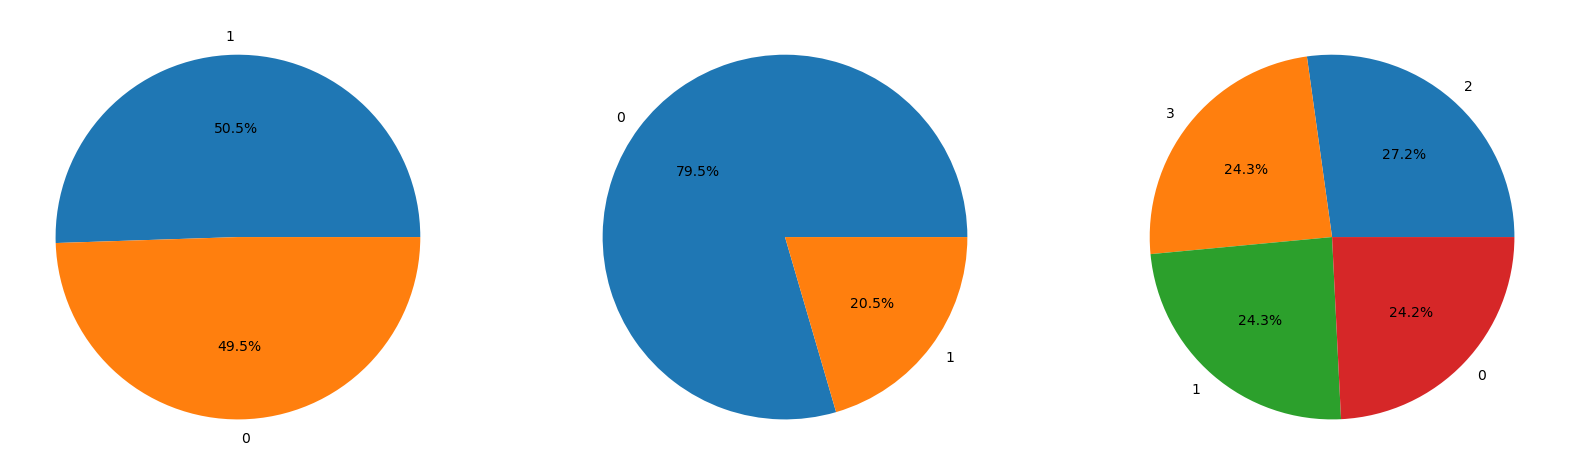

In [107]:
# checking distributions
features = ['sex', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    x = df[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')

plt.show()


# Data Preprocessing 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

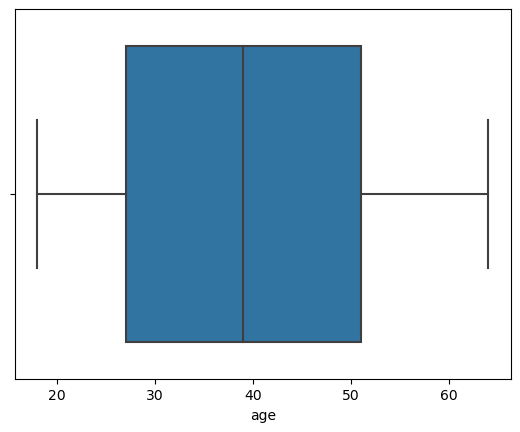

In [111]:
# Checking outliers
df.drop_duplicates(inplace=True)
sns.boxplot(df['age'])


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

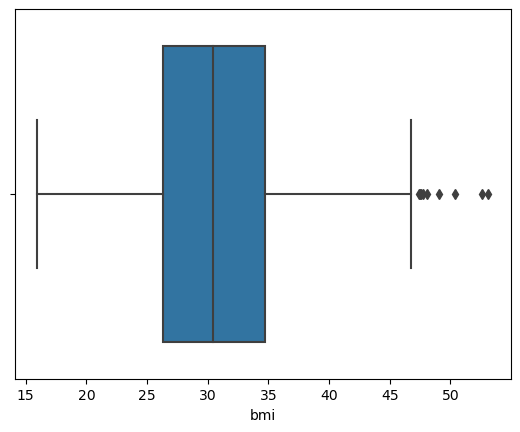

In [113]:
sns.boxplot(df['bmi']) #Due to the presence of outliers present in bmi column we need to treat 
                       #the outliers by replacing the values with mean

In [114]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

13.674999999999994
47.31500000000001


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

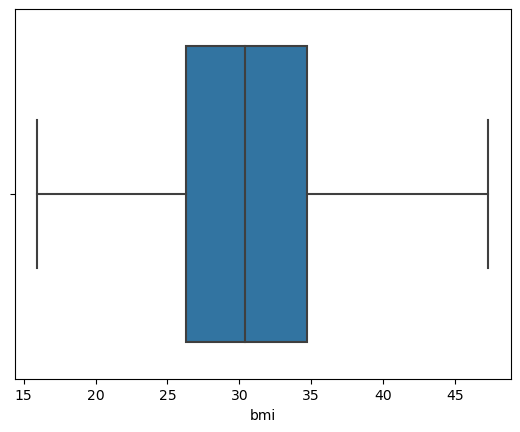

In [116]:
# treating outliers
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])

# Data Wrangling

In [118]:
df['bmi'].skew()

0.23289153320569975

In [119]:
df['age'].skew()

0.054780773126998195

In [120]:
#Data in both the age and BMI column approximately follow a Normal distribution 
#which is a good point with respect to the model’s learning.

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(
  df.drop('charges', axis=1), df['charges'], test_size=0.3, random_state=0)

In [126]:
!pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable


In [132]:
from category_encoders import OneHotEncoder

# Create an object of the OneHotEncoder
ohe_enc = OneHotEncoder()

# Fit and transform data
encoded_df = ohe_enc.fit_transform(df)

In [133]:
# fit the encoder to the train set: it will learn the variables and 
# categories to encode
ohe_enc.fit(X_train)

OneHotEncoder(cols=[])

In [134]:
# let's transform train and test set

X_train_enc = ohe_enc.transform(X_train)
X_test_enc = ohe_enc.transform(X_test)

# Random Forest Regressor

In [135]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor

In [137]:
#creating an object
forest = RandomForestRegressor()

In [140]:
# to train we use fit
forest.fit(X_train,y_train)

RandomForestRegressor()

In [141]:
# to train we use predict
forest_train_pred = forest.predict(X_train)

In [149]:
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

R2 train data: 0.975, R2 test data: 0.853


The analysis using random forest algorithm gives accuracy of 97.5% on the training data and 85.3% on the testing dataset